<a href="https://colab.research.google.com/github/utsavdarlami/NepalLicensePlateRecognition/blob/master/prepareDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing Dataset

In [0]:
import numpy as np
import cv2
import time
import os
import matplotlib.pyplot as plt
import pickle
dataset ='Dataset/thresholdImages/'
os.listdir(dataset)

['0',
 '6',
 '4',
 '5',
 'Ko',
 'Ka',
 'pa',
 '8',
 'Kha',
 'Cha',
 '7',
 'Ba',
 'Se',
 '2',
 '9',
 'PA',
 'ba',
 'BA',
 'Pradesh',
 'Pa',
 '3',
 '1']

In [0]:
labels = list(filter(lambda x : x!='Pradesh',os.listdir(dataset)))
labels = np.array(labels)
labels # our labels for training

array(['0', '6', '4', '5', 'Ko', 'Ka', 'pa', '8', 'Kha', 'Cha', '7', 'Ba',
       'Se', '2', '9', 'PA', 'ba', 'BA', 'Pa', '3', '1'], dtype='<U3')

In [0]:
64*64

4096

In [0]:
imageX_Axis = [] # creating X label 
imageY_Axis = [] # creating Y label

image_width= 32
image_height=32

dim = (image_width,image_height)
for label in labels:
    
    #path of the image folder
    labelPath = dataset + label
#     print(labelPath)
    #making a list of all images in the image folder
    image_Of_label = os.listdir(labelPath)
    
#     i=0
    for singleImage in image_Of_label:
        # single image path 
        imgPath = labelPath +'/'+singleImage
#         print(imgPath)
        image_ = cv2.imread(imgPath)  # reading a single Image
#         resizing image to 32*32 
        resize_image = cv2.resize(image_,dim,interpolation= cv2.INTER_CUBIC)  
#         print(resize_image.shape)
        imgArr = np.array(resize_image)       #converting it to numpyarray
        imgArr = imgArr[:,:,0] #changing to 2 dimension (32,32)
        
        imgArr = imgArr.ravel() # flatten the numpy array 32*32 = 1024 pixels
#         print(len(imgArr))
        # adding it to a numpy array withits Label
        imageX_Axis.append(imgArr)
        imageX_Path.append(imgPath)
        imageY_Axis.append(label)
        
#         if i==1:
#             break
#         i+=1
imageX_Axis= np.array(imageX_Axis)
imageY_Axis= np.array(imageY_Axis)




In [0]:
print(f"X-axis Length : {len(imageX_Axis)}")
print(f"Y-axis Length : {len(imageY_Axis)}")

X-axis Length : 2431
Y-axis Length : 2431


In [0]:
Pa = filter(lambda x:x == "Pa",imageY_Axis)
len(list(Pa))

45

In [0]:
pa = filter(lambda x:x == "pa",imageY_Axis)
len(list(pa))

133

#### Fixing the Labels with same name but different case
- PA == Pa or pA or pa
- BA == ba or Ba or bA

In [0]:
imageY_Axis = list(map(lambda x:x.upper() ,imageY_Axis))
# imageY_Axis = list(map(lambda x: "PA" if x == "Pa" or x=="pA" or x=="pa" else x,imageY_Axis))

In [0]:
Pa = filter(lambda x:x == "BA",imageY_Axis)
len(list(Pa))

198

In [0]:
imIndex=4
testImg = imageX_Axis[imIndex]
testImg_Label = imageY_Axis[imIndex]
testImg = testImg.reshape(32,32)

True Label : 0


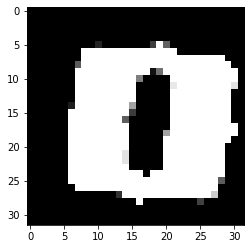

In [0]:
plt.imshow(testImg,cmap="gray")
print(f"True Label : {testImg_Label}")

In [0]:
# Using numpy's savez function to store our loaded data as NPZ files
np.savez('imageX_Axis.npz', imageX_Axis)
np.savez('imageY_Axis.npz', imageY_Axis)


def load_dataset(): # Loads the saved numpy object and returns them as tuple
    
    npzfile = np.load("imageX_Axis.npz",allow_pickle=True)
    x_axis = npzfile['arr_0'] # x - axis
    
    npzfile = np.load("imageY_Axis.npz",allow_pickle=True)
    y_axis = npzfile['arr_0'] # y - axis
    
    return (x_axis,y_axis)

In [0]:
x_Axis,y_Axis= load_dataset()
print(f"X-axis Length : {len(x_Axis)}")
print(f"Y-axis Length : {len(y_Axis)}")

X-axis Length : 2431
Y-axis Length : 2431


True Label : 0


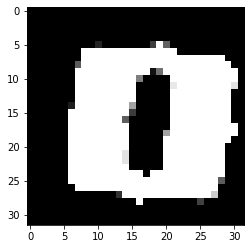

In [0]:
imIndex=4
testImg = x_Axis[imIndex]
testImg_Label = y_Axis[imIndex]
testImg = testImg.reshape(32,32)
plt.imshow(testImg,cmap="gray")
print(f"True Label : {testImg_Label}")